In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\displays'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
import score_plots
import draft_charts
import performance_charts
import display_utils

In [2]:
# Constants to use in this notebook
season = "2025"
show_charts = True
show_plots = True
# Build the database for the season
db = database.database(season)

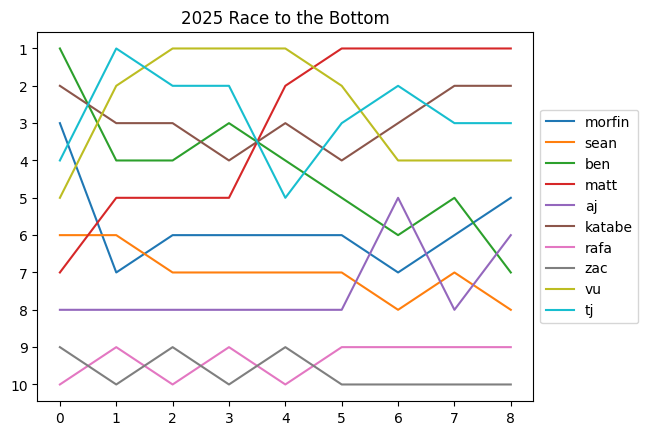

In [3]:
display_utils.display_race_to_the_bottom(db)

In [4]:
display_utils.display_head_to_heads(db)
display_utils.display_manager_z_scores(db)
display_utils.display_opponent_z_scores(db)
display_utils.display_manager_gw_scores(db)
display_utils.display_opponent_gw_scores(db)

,morfin,sean,ben,matt,aj,katabe,rafa,zac,vu,tj
Against morfin,nan,1,1,0,1,0,0,0,0,1
Against sean,0,nan,1,1,0,0,1,0,1,1
Against ben,0,0,nan,1,1,1,0,1,1,0
Against matt,1,0,0,nan,0,0,0,0,0,0
Against aj,0,1,0,1,nan,1,0,0,0,1
Against katabe,1,1,0,1,0,nan,0,0,0,0
Against rafa,1,0,1,1,0,1,nan,0,1,1
Against zac,1,1,0,1,1,1,1,nan,1,1
Against vu,1,0,0,1,1,1,0,0,nan,0
Against tj,0,0,1,1,0,1,0,0,1,nan


,morfin,sean,ben,matt,aj,katabe,rafa,zac,vu,tj
Average,0.14,-0.15,0.29,0.60,-0.25,0.22,-0.91,-0.67,0.11,0.63
Median,-0.20,-0.30,0.22,0.56,-0.30,0.14,-0.91,-0.82,0.26,0.59


,morfin,sean,ben,matt,aj,katabe,rafa,zac,vu,tj
Average,0.20,-0.12,0.31,-0.39,-0.24,0.04,-0.05,0.62,-0.34,-0.01
Median,0.33,0.01,0.54,-0.28,-0.23,0.21,-0.20,1.05,-0.77,-0.77


,morfin,sean,ben,matt,aj,katabe,rafa,zac,vu,tj
Average,135.22,129.61,140.94,147.33,126.61,143.72,112.56,114.06,138.06,153.06
Median,131.50,129.00,142.00,147.00,132.00,139.50,107.50,110.50,144.00,149.50


,morfin,sean,ben,matt,aj,katabe,rafa,zac,vu,tj
Average,140.17,130.78,140.83,127.44,127.06,135.56,131.78,146.06,128.67,132.83
Median,142.50,126.00,147.50,129.00,126.50,140.50,132.00,146.00,110.50,125.50


In [ ]:
print(db.get_season(), "Scores")

if(show_plots):
    score_plots.plot_manager_scores(db)
    score_plots.plot_opponent_scores(db)
    score_plots.plot_gw_scores(db)

In [ ]:
print(db.get_season(), "Performances")

if(show_plots):
    performance_plots.plot_manager_performances(db)
    performance_plots.plot_opponent_performances(db)
    performance_plots.plot_gw_performances(db)

In [ ]:
print(db.get_season(), "Roster Contributions")

if(show_charts):
    roster_charts.chart_roster_contributions_for_players(db, True)
    roster_charts.chart_roster_contributions_for_players(db, False)
    roster_charts.chart_roster_contributions_for_top_teams(db)
    roster_charts.chart_roster_contributions_for_teams(db)
    roster_charts.chart_roster_contributions_for_positions(db)

if(show_plots):
    roster_plots.plot_roster_scores_by_position(db)
    roster_plots.plot_roster_scores_by_team(db)

In [ ]:
print(db.get_season(), "Positional Contributions")
# Chart the contributions for the season
roster_charts.chart_postitional_contributions(db)

In [ ]:
print(db.get_season(), "Team Contributions")
# Chart the contributions for the season
roster_charts.chart_team_contributions(db)

In [ ]:
print(db.get_season(), "Drafts")

if(show_charts):
    draft_charts.chart_draft_impacts(db)

In [ ]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_lineup_changes()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Lineup Changes');

In [ ]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    
    for name in managers:
        manager_lineup_changes = db.get_manager_activity_reader(name).get_claims_drops()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Claim / Drops');